In [1]:
!pip install explainerdashboard
!pip install optuna
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.2.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainerdashboard 0.4.2.1 requires scikit-learn>=1.1, but you have scikit-learn 0.23.2 which is incompatible.


In [4]:
!pip install -U jinja2==3.0.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# System
from time import time
import pandas as pd
# Data
pd.set_option('display.max_columns', None)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.contrib.missing import MissingValuesBar

%matplotlib inline

# Explainability
import shap

In [2]:
df=pd.read_csv("/content/diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Dealing with missing values,
import numpy as np
df = df.replace('?', np.NaN) 
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
null_values = df.isnull().sum() 
null_values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
df = df.drop(columns=['admission_type_id','admission_source_id','payer_code'])
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
unique_values = df['readmitted'].unique()
unique_values

array(['NO', '>30', '<30'], dtype=object)

In [8]:
value_counts = df['readmitted'].value_counts()
value_counts

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [9]:
df['label'] = np.where(df['readmitted'] == 'NO', 0, 1)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,label
0,2278392,8222157,Caucasian,Female,[0-10),NaN,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [10]:
df = df.drop('readmitted', axis=1)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label
0,2278392,8222157,Caucasian,Female,[0-10),NaN,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


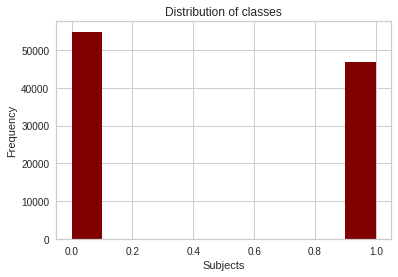

In [11]:
plt.hist(df["label"], color = "maroon")
plt.xlabel("Subjects")
plt.ylabel("Frequency")
plt.title("Distribution of classes");

In [12]:
unique_values = df['discharge_disposition_id'].unique()
unique_values

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [13]:
value_counts = df['discharge_disposition_id'].value_counts()
value_counts

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [14]:
df = df[((df.discharge_disposition_id != 11) & (df.discharge_disposition_id != 13) & (df.discharge_disposition_id != 14) & (df.discharge_disposition_id != 19) & (df.discharge_disposition_id != 20) & (df.discharge_disposition_id != 21))] 

In [15]:
unique_values = df['discharge_disposition_id'].unique()
unique_values

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27])

In [16]:
# split the range values into two columns
df[['start', 'end']] = df['age'].str.strip('[]').str.split('-', expand=True)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label,start,end
0,2278392,8222157,Caucasian,Female,[0-10),NaN,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,10)
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,10,20)
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,20,30)
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,30,40)
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,40,50)


In [17]:
# convert the start and end columns to integers
df['end'] = df['end'].str.replace(r'\(|\)', '')
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])
df.head()

The default value of regex will change from True to False in a future version.


,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label,start,end
0,2278392,8222157,Caucasian,Female,[0-10),NaN,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,10
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,10,20
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,20,30
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,30,40
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,40,50


In [18]:
# calculate the row-wise mean and assign to a new column
df['average'] = df[['start', 'end']].mean(axis=1)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label,start,end,average
0,2278392,8222157,Caucasian,Female,[0-10),NaN,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,10,5.0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,10,20,15.0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,20,30,25.0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,30,40,35.0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,40,50,45.0


In [19]:
df = df.drop(columns=['age', 'start','end'])
df.head()

,encounter_id,patient_nbr,race,gender,weight,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label,average
0,2278392,8222157,Caucasian,Female,NaN,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,5.0
1,149190,55629189,Caucasian,Female,NaN,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,15.0
2,64410,86047875,AfricanAmerican,Female,NaN,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,25.0
3,500364,82442376,Caucasian,Male,NaN,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,35.0
4,16680,42519267,Caucasian,Male,NaN,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,45.0


In [20]:
unique_values = df['weight'].unique()
unique_values


array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [21]:
value_counts = df['weight'].value_counts()
value_counts

[75-100)     1312
[50-75)       867
[100-125)     617
[125-150)     143
[25-50)        90
[0-25)         48
[150-175)      34
[175-200)      11
>200            3
Name: weight, dtype: int64

In [22]:
num_nan_values = df['weight'].isna().sum()
num_nan_values

96218

In [23]:
df = df.drop('weight', axis=1)
df.head()

,encounter_id,patient_nbr,race,gender,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label,average
0,2278392,8222157,Caucasian,Female,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,5.0
1,149190,55629189,Caucasian,Female,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,15.0
2,64410,86047875,AfricanAmerican,Female,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,25.0
3,500364,82442376,Caucasian,Male,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,35.0
4,16680,42519267,Caucasian,Male,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,45.0


In [24]:
value_counts = df['gender'].value_counts()
value_counts

Female             53454
Male               45886
Unknown/Invalid        3
Name: gender, dtype: int64

In [25]:
mask = df.loc[:, 'gender'].isin(['Male', 'Female'])
df = df[mask]
df.head()

,encounter_id,patient_nbr,race,gender,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label,average
0,2278392,8222157,Caucasian,Female,25,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,5.0
1,149190,55629189,Caucasian,Female,1,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,15.0
2,64410,86047875,AfricanAmerican,Female,1,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,25.0
3,500364,82442376,Caucasian,Male,1,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,35.0
4,16680,42519267,Caucasian,Male,1,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,45.0


In [26]:
value_counts = df['gender'].value_counts()
value_counts

Female    53454
Male      45886
Name: gender, dtype: int64

In [27]:
value_counts = df['race'].value_counts()
value_counts

Caucasian          74220
AfricanAmerican    18772
Hispanic            2017
Other               1471
Asian                628
Name: race, dtype: int64

In [28]:
unique_values = df['race'].unique()
unique_values

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [29]:
unique_values = df['medical_specialty'].unique()
unique_values

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [30]:
df = df.drop('medical_specialty', axis=1)
df.head()

,encounter_id,patient_nbr,race,gender,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label,average
0,2278392,8222157,Caucasian,Female,25,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,5.0
1,149190,55629189,Caucasian,Female,1,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,15.0
2,64410,86047875,AfricanAmerican,Female,1,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,25.0
3,500364,82442376,Caucasian,Male,1,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,35.0
4,16680,42519267,Caucasian,Male,1,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,45.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99340 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              99340 non-null  int64  
 1   patient_nbr               99340 non-null  int64  
 2   race                      97108 non-null  object 
 3   gender                    99340 non-null  object 
 4   discharge_disposition_id  99340 non-null  int64  
 5   time_in_hospital          99340 non-null  int64  
 6   num_lab_procedures        99340 non-null  int64  
 7   num_procedures            99340 non-null  int64  
 8   num_medications           99340 non-null  int64  
 9   number_outpatient         99340 non-null  int64  
 10  number_emergency          99340 non-null  int64  
 11  number_inpatient          99340 non-null  int64  
 12  diag_1                    99320 non-null  object 
 13  diag_2                    98984 non-null  object 
 14  diag_

In [32]:
df.shape

(99340, 45)

In [33]:
df.corr()

,encounter_id,patient_nbr,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,label,average
encounter_id,1.000000,0.513456,-0.143459,-0.063820,-0.029025,-0.013980,0.076999,0.104813,0.083382,0.030805,0.265686,-0.037695,0.070989
patient_nbr,0.513456,1.000000,-0.145800,-0.025026,0.011739,-0.016987,0.021545,0.103930,0.063482,0.013715,0.227584,0.077361,0.070071
discharge_disposition_id,-0.143459,-0.145800,1.000000,0.161122,0.009743,0.012892,0.106209,-0.009364,-0.024347,0.015750,0.031263,0.017338,0.096306
time_in_hospital,-0.063820,-0.025026,0.161122,1.000000,0.319833,0.189934,0.463759,-0.009218,-0.009575,0.074247,0.220566,0.057853,0.107079
num_lab_procedures,-0.029025,0.011739,0.009743,0.319833,1.000000,0.051756,0.265164,-0.007614,-0.000983,0.039902,0.149626,0.049197,0.016330
num_procedures,-0.013980,-0.016987,0.012892,0.189934,0.051756,1.000000,0.381924,-0.025256,-0.038711,-0.067011,0.070496,-0.042182,-0.027901
num_medications,0.076999,0.021545,0.106209,0.463759,0.265164,0.381924,1.000000,0.046038,0.014029,0.065268,0.261642,0.052930,0.043158
number_outpatient,0.104813,0.103930,-0.009364,-0.009218,-0.007614,-0.025256,0.046038,1.000000,0.091667,0.108012,0.094825,0.084287,0.023675
number_emergency,0.083382,0.063482,-0.024347,-0.009575,-0.000983,-0.038711,0.014029,0.091667,1.000000,0.267700,0.055991,0.103834,-0.087566
number_inpatient,0.030805,0.013715,0.015750,0.074247,0.039902,-0.067011,0.065268,0.108012,0.267700,1.000000,0.104729,0.225291,-0.044332


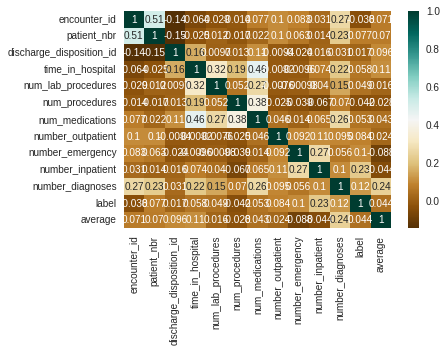

In [34]:
heatmap = sns.heatmap(df.corr(),annot=True,cmap='BrBG')

In [35]:
# Drop essential column that will be use for prediction.
X = df.drop(['label'],axis=1)
y = df['label']

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
data_train=pd.concat([X_train, y_train], axis=1)
data_train.shape

(79472, 45)

In [38]:
data_test=pd.concat([X_test, y_test], axis=1)
data_test.shape

(19868, 45)

In [39]:
data_train.head()

,encounter_id,patient_nbr,race,gender,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,average,label
34395,107691210,103384989,Caucasian,Female,1,1,35,1,8,3,0,0,246,401,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,75.0,1
27163,89098386,702801,Caucasian,Male,1,6,74,0,24,0,0,0,486,427,496,9,None,>8,Steady,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,75.0,0
25781,85629360,968337,AfricanAmerican,Female,1,2,22,3,15,0,0,1,648,250.01,648,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,35.0,0
5002,26986782,1870038,Caucasian,Female,1,10,45,2,22,0,0,0,428,425,153,9,None,None,No,No,No,No,No,No,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,85.0,0
72767,213622080,58585113,AfricanAmerican,Male,1,13,65,3,26,0,1,0,428,789,574,9,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,65.0,1


In [40]:
data_test.head()

,encounter_id,patient_nbr,race,gender,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,average,label
51166,152899650,30413628,Caucasian,Male,1,6,52,2,13,0,3,0,682,250.02,780,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,55.0,0
6374,31718814,5914881,Caucasian,Female,6,8,84,3,11,0,0,0,590,276,595,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,45.0,1
37886,117555720,110478672,AfricanAmerican,Male,3,3,63,0,11,0,0,2,507,599,427,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,75.0,0
45831,141561360,54194769,AfricanAmerican,Male,6,3,35,4,11,0,0,3,578,280,535,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,65.0,1
13114,52554402,3184848,AfricanAmerican,Male,18,3,52,0,23,0,0,0,414,491,250.02,9,None,None,No,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,55.0,1


In [42]:
# create train - test datasets
print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))

Data for Modeling: (79472, 45)
Unseen Data For Predictions: (19868, 45)


In [ ]:
# import pandas_profiling

In [ ]:
# report = pandas_profiling.ProfileReport(data_train)
# report

In [43]:
from pycaret.classification import *

In [45]:
experiment = setup(data=data_train, target='label', data_split_shuffle = True, data_split_stratify =True,
                    fold_shuffle=True, normalize=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(79472, 45)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='label',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                                                  target='label')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 

In [2]:
all_model=compare_models()

NameError: ignored

In [1]:
et_model = create_model('et')

NameError: ignored

In [ ]:
lightgbm_model = create_model('lightgbm',return_train_score=True)

In [ ]:
knn_model = create_model('knn',return_train_score=True)

In [ ]:
rf_model = create_model('rf',return_train_score=True)

In [ ]:
et_model

In [ ]:
evaluate_model(knn_model)

In [ ]:
evaluate_model(et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(lightgbm_model)

In [ ]:
evaluate_model(rf_model)

## 9.1 - SHAP Summary Plot

Shows effects of each feature on model predictions based on SHAP values for the entire test dataset. 

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

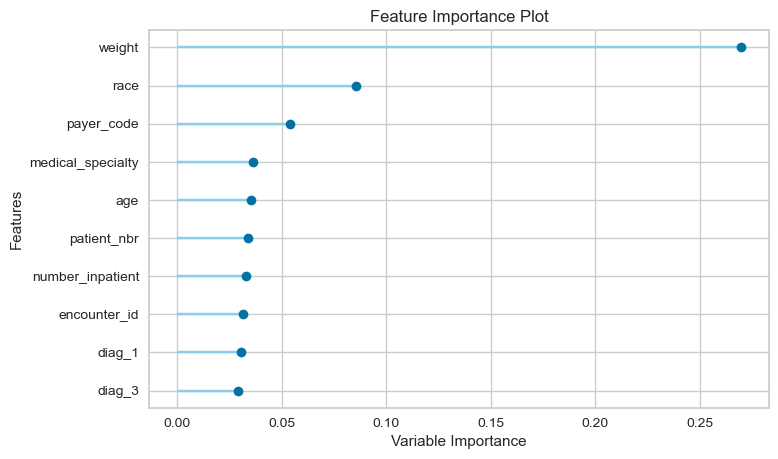

In [ ]:
plot_model(et_model, plot='feature')

In [ ]:
interpret_model(et_model, plot='summary')

## 9.4 - XAI Explainer Dashboard

This generates an interactive dashboard for a trained model consisting of evaluation metrics and SHAP based explanation artifacts

In [ ]:
# dashboard(Best_Model)

# 10) Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting on the test/hold-out set and reviewing the evaluation metrics. 

30% (260 samples) of the data has been separated out as test/hold-out sample. 

All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. The `plot_model` shows results on the Test Data.

We can use our trained model stored in the `Best_Model` variable to get predictions from our test data and use them as necessary

In [ ]:
new_predictions1 = predict_model(knn_model, raw_score=True)

In [ ]:
new_predictions2 = predict_model(et_model, raw_score=True)

In [ ]:
new_predictions3 = predict_model(lightgbm_model, raw_score=True)

In [ ]:
new_predictions4 = predict_model(rf_model, raw_score=True)

# 11 - Finalize Model for Deployment

Model finalization is the last step in the experiment. 

A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. (more on advanced techniques in the next tutorial!).

This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. 


The `finalize_model()` function fits the model onto the complete dataset **including** the test/hold-out sample (30% in this case). The purpose of this function is to **train the model on the complete dataset** before it is deployed in production.

In [ ]:
final_model1 = finalize_model(knn_model)

In [ ]:
final_model2 = finalize_model(et_model)

In [ ]:
final_model3 = finalize_model(lightgbm_model)

In [ ]:
final_model4 = finalize_model(rf_model)

# 12 - Predict on unseen / new datasets

The `predict_model()` function is also used to predict on any new / unseen datasets. 

The only difference from section 11 above is that this time we will pass the `data_test` parameter. `data_test` is the variable created at the beginning of the tutorial and contains 15% of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [ ]:
new_predictions1 = predict_model(final_model1, data=data_test, raw_score=True)

In [ ]:
new_predictions2 = predict_model(final_model2, data=data_test, raw_score=True)


In [ ]:
new_predictions3 = predict_model(final_model3, data=data_test, raw_score=True)


In [ ]:
new_predictions4 = predict_model(final_model4, data=data_test, raw_score=True)


In [ ]:
new_predictions1.head()

In [ ]:
# launch eda
!pip install autoviz
eda(display_format = 'bokeh')

In [ ]:
save_model(final_model,'knn_model')